<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(2_8)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,35.132896,23.501746,-121.289855,-52.655213,172.489127,-225.144339
1,0.0,1.0,86.298194,38.864507,-192.173034,-57.010332,-22.857902,-34.152430
2,0.0,2.0,58.832436,57.417791,779.779203,906.029430,182.740830,723.288600
3,0.0,3.0,21.156678,94.047061,910.547846,1035.751585,506.787587,528.963998
4,0.0,4.0,23.699788,54.847643,-49.046427,39.501004,346.865988,-307.364983
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.268630,45.246901,-397.459026,-271.943494,-5.962324,-265.981171
29996,999.0,26.0,41.970177,46.195689,-3.359137,94.806729,59.212162,35.594567
29997,999.0,27.0,52.345470,25.046042,4.673786,92.065298,29.383401,62.681898
29998,999.0,28.0,95.403891,83.175410,744.836242,933.415543,-52.792879,986.208423


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e            Y       y_hat  \
rep   index                                                              
0.0   0.0    35.132896  23.501746 -121.289855   -52.655213  172.489127   
      1.0    86.298194  38.864507 -192.173034   -57.010332  -22.857902   
      2.0    58.832436  57.417791  779.779203   906.029430  182.740830   
      3.0    21.156678  94.047061  910.547846  1035.751585  506.787587   
      4.0    23.699788  54.847643  -49.046427    39.501004  346.865988   
...                ...        ...         ...          ...         ...   
999.0 25.0   70.268630  45.246901 -397.459026  -271.943494   -5.962324   
      26.0   41.970177  46.195689   -3.359137    94.806729   59.212162   
      27.0   52.345470  25.046042    4.673786    92.065298   29.383401   
      28.0   95.403891  83.175410  744.836242   933.415543  -52.792879   
      29.0   46.522645  25.607356  -58.680824    23.449176   42.898435   

                  e_hat  
rep   index              
0.0   0.0   -225.144339  
      1.0    -34.152430  
      2.0    723.288600  
      3.0    528.963998  
      4.0   -307.364983  
...                 ...  
999.0 25.0  -265.981171  
      26.0    35.594567  
      27.0    62.681898  
      28.0   986.208423  
      29.0   -19.449259  

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e            Y       y_hat  \
rep   index                                                              
0.0   0.0    35.132896  23.501746 -121.289855   -52.655213  172.489127   
      1.0    86.298194  38.864507 -192.173034   -57.010332  -22.857902   
      2.0    58.832436  57.417791  779.779203   906.029430  182.740830   
      3.0    21.156678  94.047061  910.547846  1035.751585  506.787587   
      4.0    23.699788  54.847643  -49.046427    39.501004  346.865988   
...                ...        ...         ...          ...         ...   
999.0 25.0   70.268630  45.246901 -397.459026  -271.943494   -5.962324   
      26.0   41.970177  46.195689   -3.359137    94.806729   59.212162   
      27.0   52.345470  25.046042    4.673786    92.065298   29.383401   
      28.0   95.403891  83.175410  744.836242   933.415543  -52.792879   
      29.0   46.522645  25.607356  -58.680824    23.449176   42.898435   

                  e_hat  
rep   index              
0.0   0.0   -225.144339  
      1.0    -34.152430  
      2.0    723.288600  
      3.0    528.963998  
      4.0   -307.364983  
...                 ...  
999.0 25.0  -265.981171  
      26.0    35.594567  
      27.0    62.681898  
      28.0   986.208423  
      29.0   -19.449259  

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,35.132896,23.501746,-121.289855,-52.655213,172.489127,-225.144339
1,0.0,1.0,86.298194,38.864507,-192.173034,-57.010332,-22.857902,-34.152430
2,0.0,2.0,58.832436,57.417791,779.779203,906.029430,182.740830,723.288600
3,0.0,3.0,21.156678,94.047061,910.547846,1035.751585,506.787587,528.963998
4,0.0,4.0,23.699788,54.847643,-49.046427,39.501004,346.865988,-307.364983
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,70.268630,45.246901,-397.459026,-271.943494,-5.962324,-265.981171
29996,999.0,26.0,41.970177,46.195689,-3.359137,94.806729,59.212162,35.594567
29997,999.0,27.0,52.345470,25.046042,4.673786,92.065298,29.383401,62.681898
29998,999.0,28.0,95.403891,83.175410,744.836242,933.415543,-52.792879,986.208423


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e            Y       y_hat  \
rep   index                                                              
0.0   0.0    35.132896  23.501746 -121.289855   -52.655213  172.489127   
      1.0    86.298194  38.864507 -192.173034   -57.010332  -22.857902   
      2.0    58.832436  57.417791  779.779203   906.029430  182.740830   
      3.0    21.156678  94.047061  910.547846  1035.751585  506.787587   
      4.0    23.699788  54.847643  -49.046427    39.501004  346.865988   
...                ...        ...         ...          ...         ...   
999.0 25.0   70.268630  45.246901 -397.459026  -271.943494   -5.962324   
      26.0   41.970177  46.195689   -3.359137    94.806729   59.212162   
      27.0   52.345470  25.046042    4.673786    92.065298   29.383401   
      28.0   95.403891  83.175410  744.836242   933.415543  -52.792879   
      29.0   46.522645  25.607356  -58.680824    23.449176   42.898435   

                  e_hat  
rep   index              
0.0   0.0   -225.144339  
      1.0    -34.152430  
      2.0    723.288600  
      3.0    528.963998  
      4.0   -307.364983  
...                 ...  
999.0 25.0  -265.981171  
      26.0    35.594567  
      27.0    62.681898  
      28.0   986.208423  
      29.0   -19.449259  

[30000 rows x 6 columns]

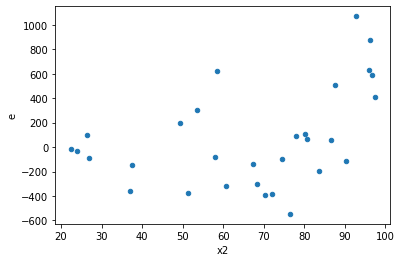

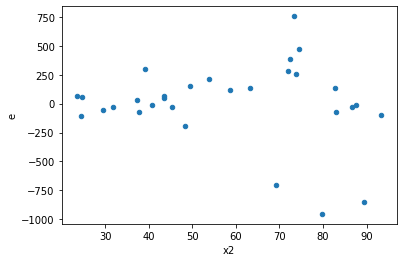

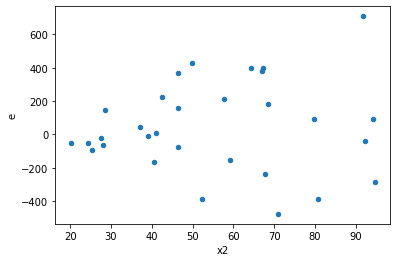

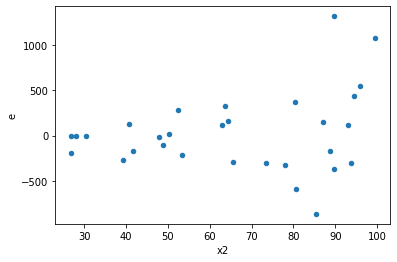

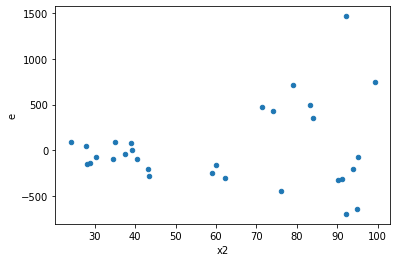

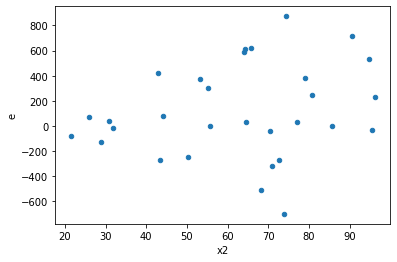

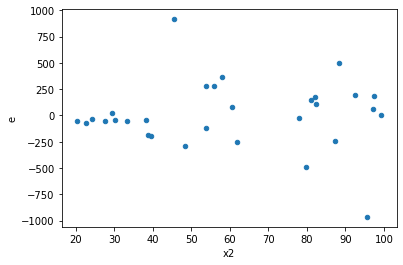

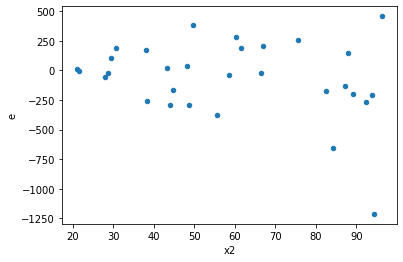

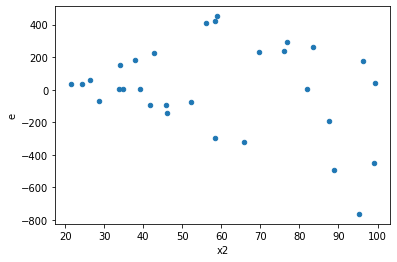

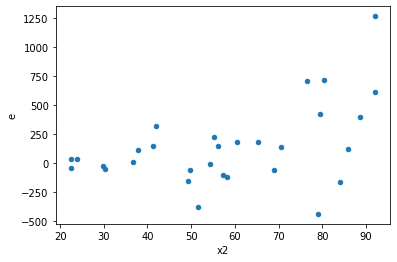

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,15.0,11.0,267617.10793852597,1389378.478414754,17841.140529235065,126307.13440134126,7.079543720558131,0.0023256336737760286,0.998837183163112,0.0011628168368880143,Reject005=0 : Heteroscedasticity
2.0,12.0,14.0,1313979.8186507735,3294865.895795879,109498.3182208978,235347.56398541993,2.149325832663828,0.17363028849296414,0.9131848557535179,0.08681514424648207,Reject005=1 : Homoscedasticity
6.0,13.0,13.0,2065717.2579827406,2115921.8828009865,158901.32753713388,162763.22175392203,1.024303725315861,0.9661272456300032,0.5169363771849984,0.4830636228150016,Reject005=1 : Homoscedasticity
7.0,16.0,10.0,888857.3053702053,761226.929606002,55553.58158563783,76122.69296060021,1.3702571605262635,0.6240984488043537,0.6879507755978231,0.31204922440217686,Reject005=1 : Homoscedasticity
10.0,8.0,18.0,181381.58570421688,2986516.244783283,22672.69821302711,165917.56915462684,7.317945468850071,0.00047517541373487404,0.9997624122931326,0.00023758770686743702,Reject005=0 : Heteroscedasticity
11.0,15.0,11.0,1343390.754623599,1597424.6959924912,89559.38364157327,145220.4269084083,1.621498730826429,0.422894496430114,0.788552751784943,0.211447248215057,Reject005=1 : Homoscedasticity
12.0,20.0,6.0,991279.8275546383,862544.5352475494,49563.991377731916,143757.42254125825,2.9004407947227087,0.19073747866550517,0.9046312606672474,0.09536873933275258,Reject005=1 : Homoscedasticity
13.0,14.0,12.0,311419.9106149553,3830704.6347761443,22244.279329639663,319225.38623134536,14.350898111856992,4.404634175259048e-05,0.9999779768291237,2.202317087629524e-05,Reject005=0 : Heteroscedasticity
14.0,13.0,13.0,122806.5503781937,5194157.839882053,9446.657721399515,399550.6030678503,42.29544616216466,3.6718233564769776e-08,0.9999999816408832,1.8359116782384888e-08,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,15.0,11.0,2854426.3809113214,543933.5647939729,190295.09206075475,49448.50589036117,0.2598517142763406,0.01736037721075701,Reject005=0 : Heteroscedasticity
1.0,15.0,11.0,267617.10793852597,1389378.478414754,17841.140529235065,126307.13440134126,7.079543720558131,0.0023256336737760286,Reject005=0 : Heteroscedasticity
2.0,12.0,14.0,1313979.8186507735,3294865.895795879,109498.3182208978,235347.56398541993,2.149325832663828,0.17363028849296414,Reject005=1 : Homoscedasticity
3.0,10.0,16.0,2653480.6047165906,409671.4734583165,265348.06047165906,25604.467091144783,0.09649389200596592,0.0006722436251121479,Reject005=0 : Heteroscedasticity
4.0,13.0,13.0,1840894.9997529956,1373362.3617896005,141607.30767330734,105643.25859920004,0.7460297094477812,0.6049883897912883,Reject005=1 : Homoscedasticity
5.0,11.0,15.0,3384553.934921408,796667.5325399654,307686.7213564916,53111.16883599769,0.17261443263410153,0.005604265399414687,Reject005=0 : Heteroscedasticity
6.0,13.0,13.0,2065717.2579827406,2115921.8828009865,158901.32753713388,162763.22175392203,1.024303725315861,0.9661272456300032,Reject005=1 : Homoscedasticity
7.0,16.0,10.0,888857.3053702053,761226.929606002,55553.58158563783,76122.69296060021,1.3702571605262635,0.6240984488043537,Reject005=1 : Homoscedasticity
8.0,17.0,9.0,2932115.662490218,616584.2153318403,172477.3919111893,68509.35725909338,0.3972077528536011,0.09667724264765976,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    549
Reject005=1 : Homoscedasticity      451
Name: Result_test, dtype: int64